In [72]:
import numpy as np
import pandas as pd
df=pd.read_csv("/kaggle/input/sensor-data/data.csv")
df

,Num,Sensor,G1,G2,G3,G4,G5
0,1,S1_245,6.151,6.199,4.184,4.539,4.369
1,2,S2_245,5.280,5.042,13.327,4.934,2.014
2,3,S3_245,3.355,3.279,8.918,2.780,1.697
3,4,S4_245,4.012,4.227,3.751,3.297,3.539
4,5,S1_285,5.506,5.051,3.312,5.377,6.678
5,6,S2_285,5.137,5.246,13.328,5.178,3.293
6,7,S3_285,3.349,3.424,8.645,2.943,3.026
7,8,S4_285,3.761,3.505,1.339,3.203,4.906
8,9,S1_310,3.281,4.240,2.162,4.695,5.683
9,10,S2_310,3.868,4.467,5.959,4.261,2.429


In [73]:
import numpy as np

def select_columns_b4(df, threshold=0.7):

    df_transposed=df.drop(columns='Num',inplace=True)
    # Transpose the DataFrame and set 'Sensor' as index
    df_transposed = df.set_index('Sensor').T

    # Compute covariance matrix
    covariance_matrix = np.cov(df_transposed, rowvar=False)
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    for i in range(covariance_matrix.shape[0]):
        
        print(eigenvalues[i])

    # Select candidate sensors using B4 technique
    selected_indices =np.where(eigenvalues > threshold)[0]
    
    selected_indices = selected_indices[np.argsort(eigenvalues[selected_indices])[::-1]]

    # Step 3: Select the top three indices
    selected_indices = selected_indices[:3]
    print(selected_indices)
    # Print the names of selected columns
    selected_column_names = [df_transposed.columns[i] for i in selected_indices]

    return selected_column_names

# Example usage:
# Assuming 'df' is your DataFrame
selected_columns = select_columns_b4(df)
print("Selected column names:", selected_columns)


(85.77435468715782+0j)
(5.195427786649732+0j)
(1.9576539087961926+0j)
(0.4212472173962698+0j)
(5.172160746258348e-15+0j)
(-2.908363416942883e-15+1.57304380154692e-15j)
(-2.908363416942883e-15-1.57304380154692e-15j)
(1.7658489692539461e-15+1.4338032529080168e-16j)
(1.7658489692539461e-15-1.4338032529080168e-16j)
(-1.2834820109654018e-15+0j)
(6.854274192055573e-16+2.30895983964005e-16j)
(6.854274192055573e-16-2.30895983964005e-16j)
(-6.517531035154116e-16+0j)
(2.955104671223483e-16+3.162994791088276e-16j)
(2.955104671223483e-16-3.162994791088276e-16j)
(-2.896649026171132e-16+0j)
(-1.3273582028706432e-16+1.2102690986026015e-16j)
(-1.3273582028706432e-16-1.2102690986026015e-16j)
(1.1859545497775873e-16+6.75866172161225e-17j)
(1.1859545497775873e-16-6.75866172161225e-17j)
[0 1 2]
Selected column names: ['S1_245', 'S2_245', 'S3_245']


In [74]:
df

,Sensor,G1,G2,G3,G4,G5
0,S1_245,6.151,6.199,4.184,4.539,4.369
1,S2_245,5.280,5.042,13.327,4.934,2.014
2,S3_245,3.355,3.279,8.918,2.780,1.697
3,S4_245,4.012,4.227,3.751,3.297,3.539
4,S1_285,5.506,5.051,3.312,5.377,6.678
5,S2_285,5.137,5.246,13.328,5.178,3.293
6,S3_285,3.349,3.424,8.645,2.943,3.026
7,S4_285,3.761,3.505,1.339,3.203,4.906
8,S1_310,3.281,4.240,2.162,4.695,5.683
9,S2_310,3.868,4.467,5.959,4.261,2.429


In [75]:
df_transposed = df.set_index('Sensor').T
df_transposed

Sensor,S1_245,S2_245,S3_245,S4_245,S1_285,S2_285,S3_285,S4_285,S1_310,S2_310,S3_310,S4_310,S1_325,S2_325,S3_325,S4_325,S1_340,S2_340,S3_340,S4_340
G1,6.151,5.280,3.355,4.012,5.506,5.137,3.349,3.761,3.281,3.868,2.343,2.379,5.602,6.575,4.504,4.315,8.000,9.593,6.978,6.013
G2,6.199,5.042,3.279,4.227,5.051,5.246,3.424,3.505,4.240,4.467,2.942,3.123,4.847,6.261,4.313,3.532,7.980,9.301,7.248,5.773
G3,4.184,13.327,8.918,3.751,3.312,13.328,8.645,1.339,2.162,5.959,4.412,0.656,0.967,8.528,6.255,0.344,0.657,6.875,6.101,0.372
G4,4.539,4.934,2.780,3.297,5.377,5.178,2.943,3.203,4.695,4.261,2.659,3.382,5.645,7.570,5.108,4.158,7.088,10.997,7.328,4.859
G5,4.369,2.014,1.697,3.539,6.678,3.293,3.026,4.906,5.683,2.429,2.086,4.215,3.837,4.847,4.545,3.236,9.669,11.023,10.353,8.554


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [85]:
df1 = df[df['Sensor'].isin(['S1_245', 'S2_245', 'S3_245'])]
df1

,Sensor,G1,G2,G3,G4,G5
0,S1_245,6.151,6.199,4.184,4.539,4.369
1,S2_245,5.280,5.042,13.327,4.934,2.014
2,S3_245,3.355,3.279,8.918,2.780,1.697


In [86]:
df_melted = df1.melt(id_vars='Sensor', value_vars=['G1', 'G2', 'G3', 'G4', 'G5'], var_name='Gas', value_name='Reading')

# Step 2: Pivot the DataFrame to make 'Sensor' values into columns
df_pivoted = df_melted.pivot(index='Gas', columns='Sensor', values='Reading')
df_pivoted.reset_index(inplace=True)
df_pivoted

Sensor,Gas,S1_245,S2_245,S3_245
0,G1,6.151,5.280,3.355
1,G2,6.199,5.042,3.279
2,G3,4.184,13.327,8.918
3,G4,4.539,4.934,2.780
4,G5,4.369,2.014,1.697


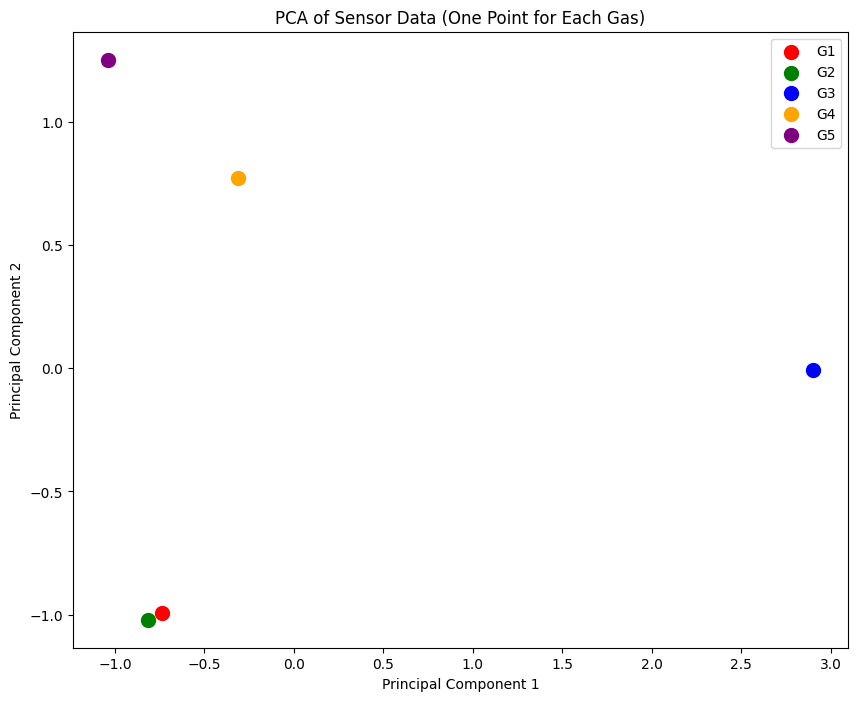

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_means = scaler.fit_transform(df_pivoted.drop(columns='Gas'))

# Apply PCA (2 components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_means)

# Create a dataframe for the PCA results with gas labels
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Gas': df_pivoted['Gas']
})

# Plotting the PCA results with one point for each gas
colors = {'G1': 'red', 'G2': 'green', 'G3': 'blue', 'G4': 'orange', 'G5': 'purple'}

plt.figure(figsize=(10, 8))
for gas, color in colors.items():
    gas_point = pca_df[pca_df['Gas'] == gas]
    plt.scatter(gas_point['PC1'], gas_point['PC2'], c=color, label=gas, s=100)  # s=100 for larger points

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sensor Data (One Point for Each Gas)')
plt.legend()
plt.show()


In [90]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_pivoted is already defined with 'Gas' and sensor data
# Standardize data and apply PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pivoted.drop(columns='Gas'))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Calculate pairwise Euclidean distances
euclidean_distances = distance.pdist(pca_result, metric='euclidean')  # Pairwise distances

# Convert to a square matrix
distance_matrix = distance.squareform(euclidean_distances)

# Create a DataFrame for distances with 'Gas' as row and column labels
df_distances = pd.DataFrame(
    distance_matrix,
    index=pca_df['Gas'],
    columns=pca_df['Gas']
)

# List to store formatted distances
formatted_distances = []

# Iterate through the upper triangular part of the distance matrix
for i in range(len(df_distances)):
    for j in range(i + 1, len(df_distances)):  # Ensures each pair is only listed once
        # Create a gas pair string
        gas_pair = f"{df_distances.index[i]}-{df_distances.columns[j]}"
        # Get the distance
        distance_value = df_distances.iloc[i, j]
        # Add to the formatted list
        formatted_distances.append(f"{gas_pair}: {distance_value:.2f}")  # Distance rounded to two decimal places

# Print formatted distances
print("Euclidean distances between gas pairs:")
for fd in formatted_distances:
    print(fd)


Euclidean distances between gas pairs:
G1-G2: 0.08
G1-G3: 3.77
G1-G4: 1.81
G1-G5: 2.26
G2-G3: 3.85
G2-G4: 1.86
G2-G5: 2.28
G3-G4: 3.30
G3-G5: 4.13
G4-G5: 0.87
